In [92]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"C:\Users\Avinash\Downloads\Iris.xls")
df

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [43]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [44]:
df['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [45]:
df.drop('Id',axis=1,inplace=True)

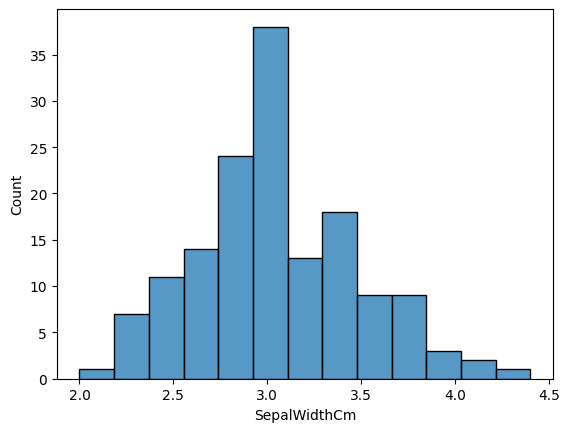

In [46]:
sns.histplot(df['SepalWidthCm'])
plt.show()

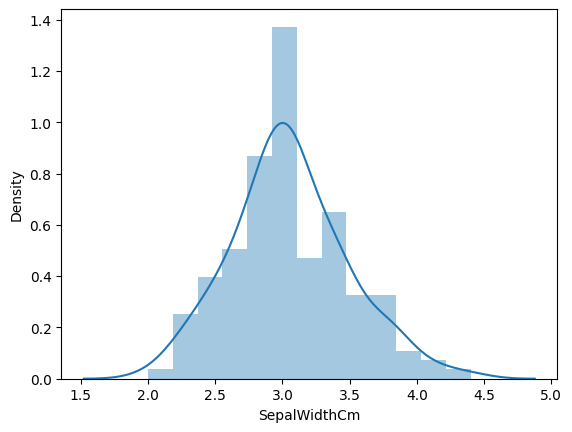

In [47]:
sns.distplot(df['SepalWidthCm'])
plt.show()

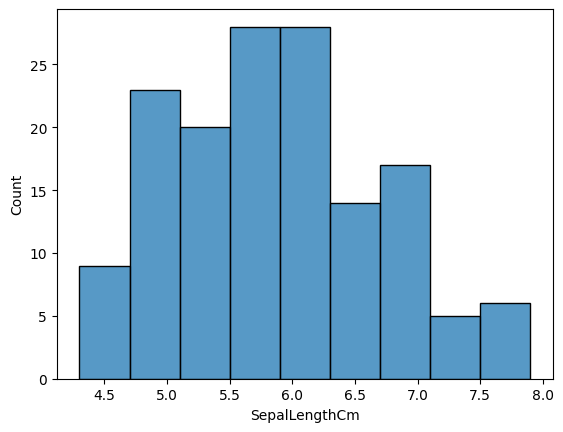

In [48]:
sns.histplot(df['SepalLengthCm'])
plt.show()

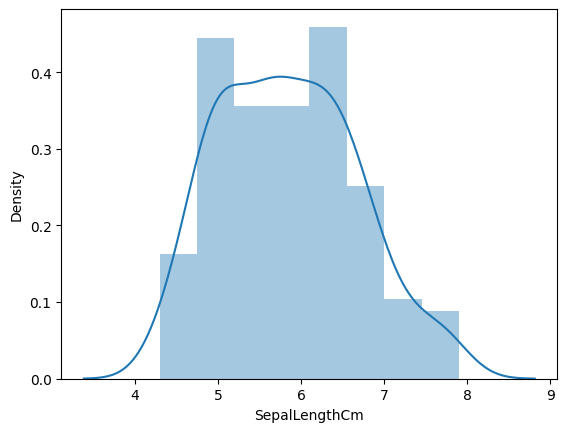

In [49]:
sns.distplot(df['SepalLengthCm'])
plt.show()

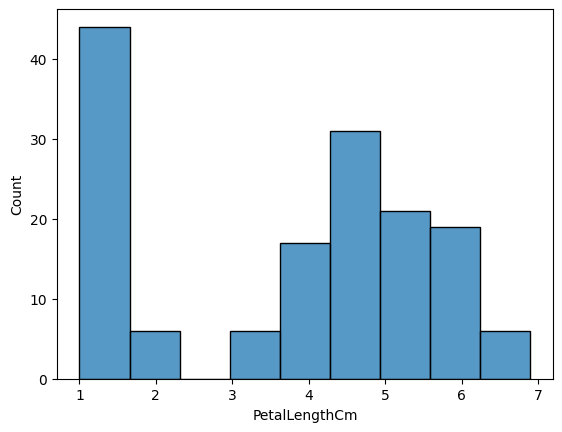

In [50]:
sns.histplot(df['PetalLengthCm'])
plt.show()

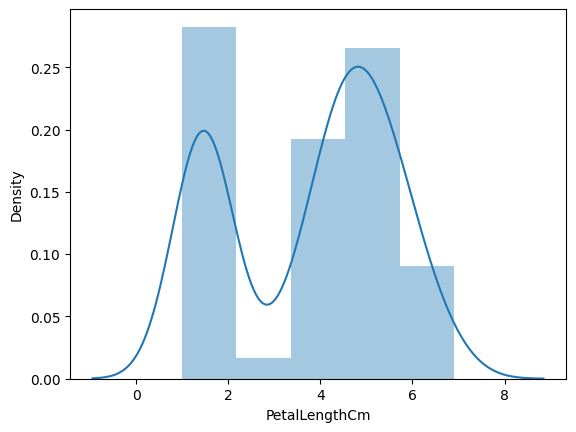

In [51]:
sns.distplot(df['PetalLengthCm'])
plt.show()

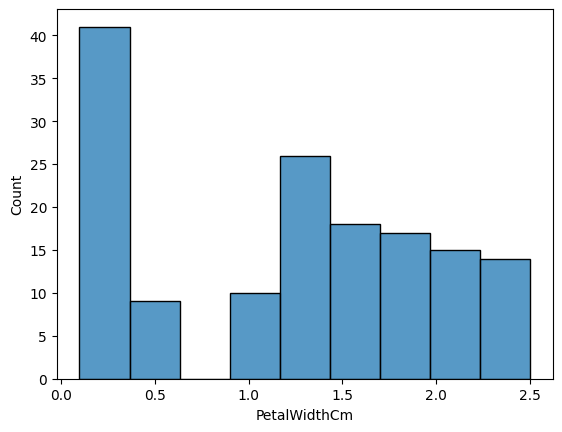

In [52]:
sns.histplot(df['PetalWidthCm'])
plt.show()

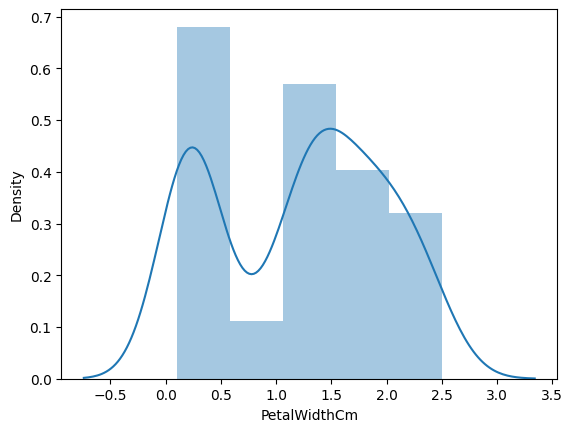

In [53]:
sns.distplot(df['PetalWidthCm'])
plt.show()

In [54]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


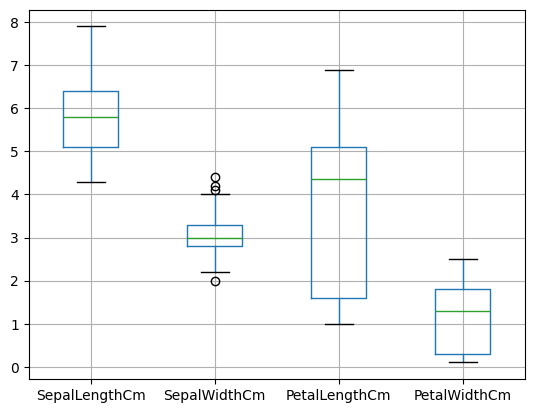

In [60]:
df.boxplot()
plt.show()

In [56]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [57]:
df['Species'].value_counts(normalize=True)

Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

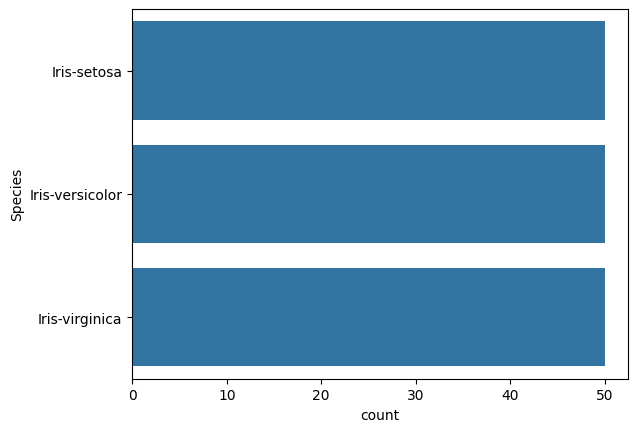

In [59]:
sns.countplot(df['Species'])
plt.show()

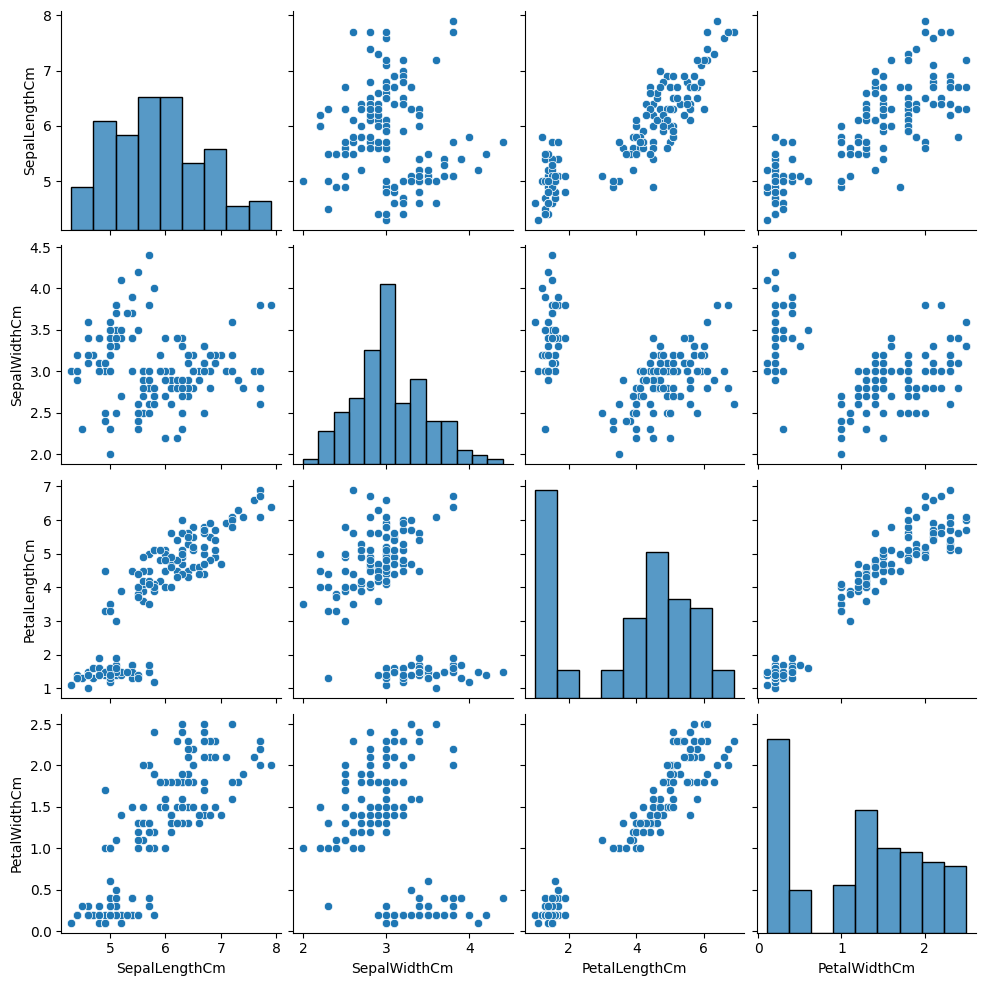

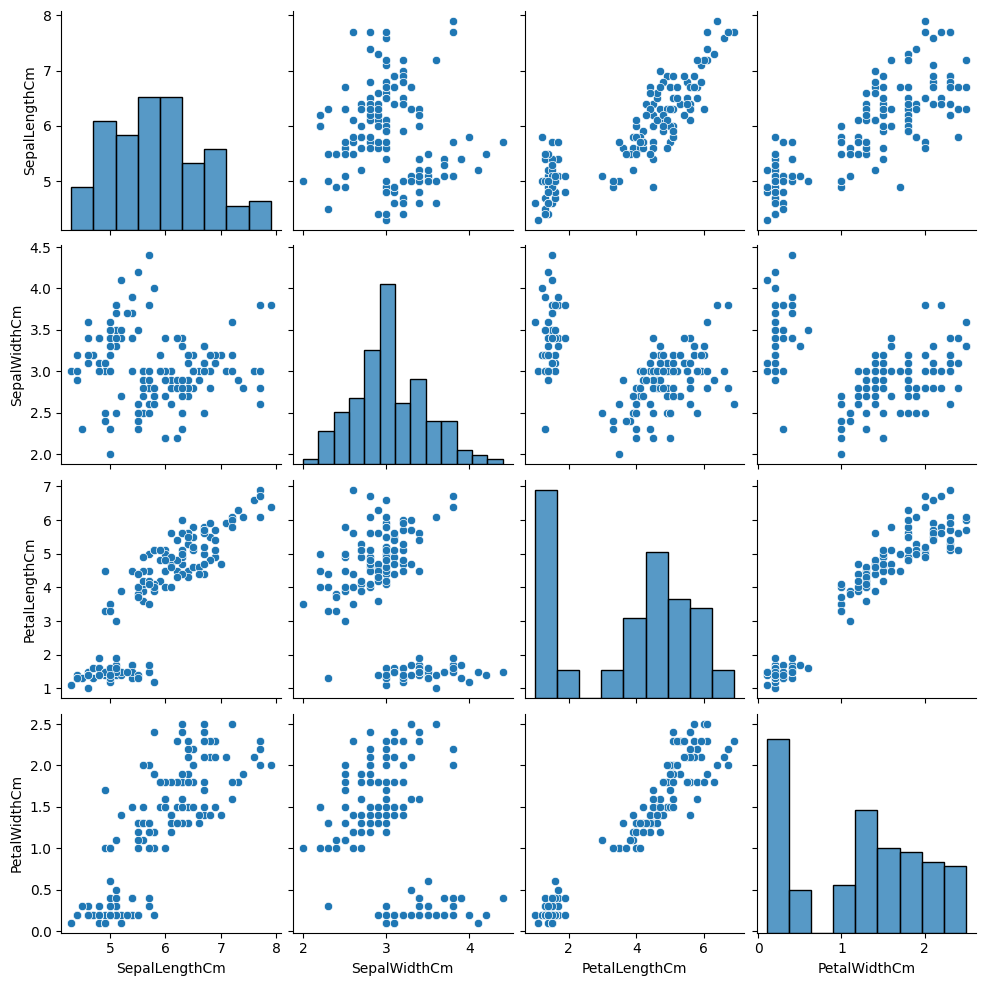

In [64]:
sns.pairplot(df)
plt.show()

## Feature Engineering/ Data Pre-Processing

In [66]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [67]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [70]:
df.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [71]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Feature Selection

In [75]:
corr=df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


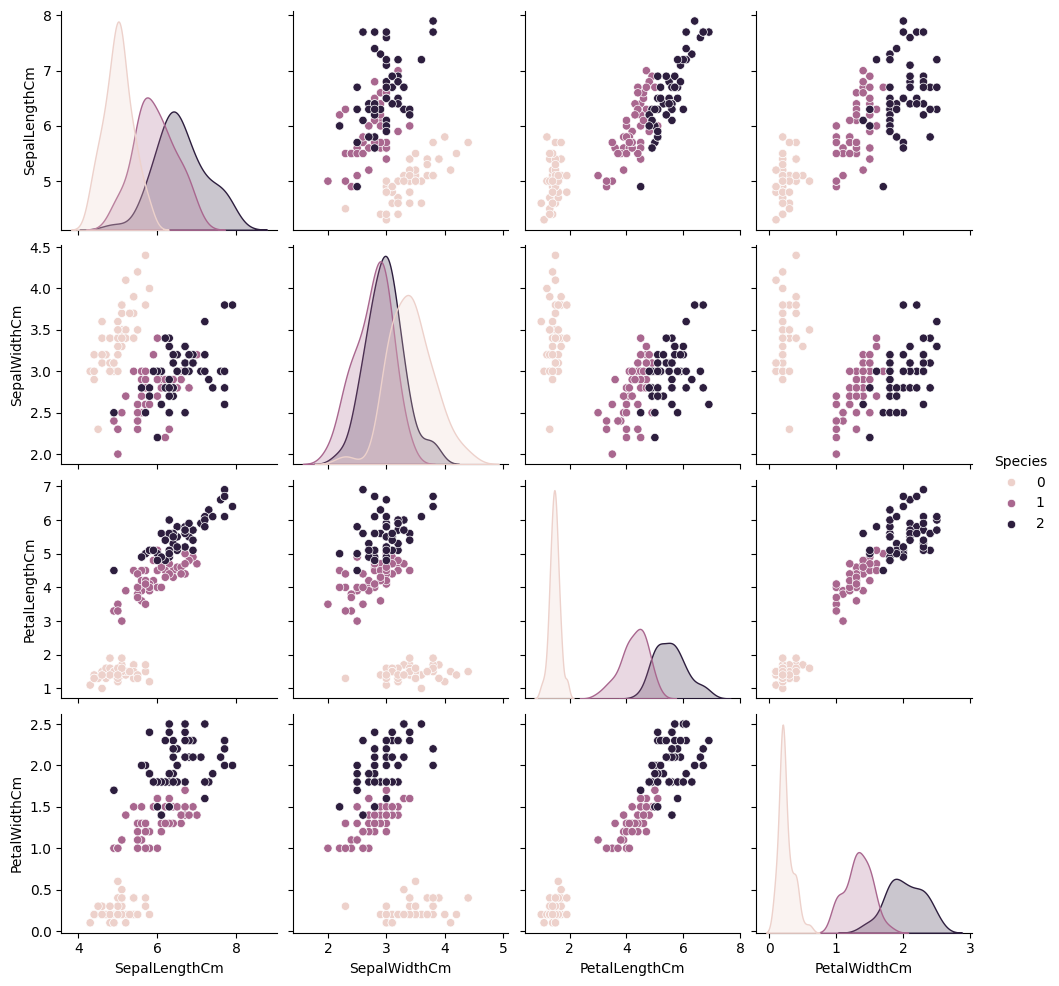

In [80]:
sns.pairplot(df, hue='Species')
plt.show()

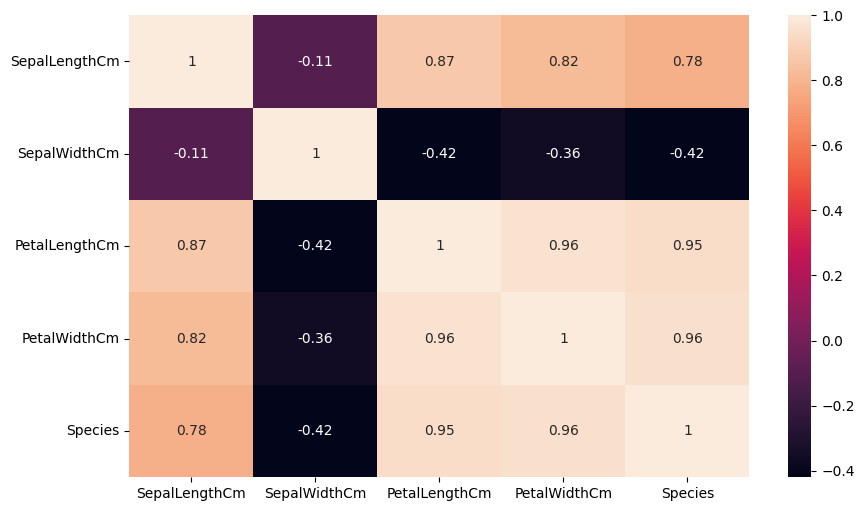

In [79]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.show()

## Model Building/Training

In [11]:
x=df.drop('Species',axis=1)
y=df['Species']

## Splitting of Dataset into train and test

In [12]:
x_train, x_test, y_train, y_test =train_test_split(x, y,test_size=0.2, random_state=1)

In [13]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [14]:
y_train

91     1
135    2
69     1
128    2
114    2
      ..
133    2
137    2
72     1
140    2
37     0
Name: Species, Length: 120, dtype: int64

In [15]:
log_reg_mod =LogisticRegression()
log_reg_mod

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
log_reg_mod.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y_pred =log_reg_mod.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [85]:
acc=accuracy_score(y_test, y_pred)
print(acc)


con_mat=confusion_matrix(y_test, y_pred)
print(con_mat)

clss_repo = classification_report(y_test,y_pred)
print(clss_repo)

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [20]:
multi =multilabel_confusion_matrix(y_test, y_pred)
multi

array([[[19,  0],
        [ 0, 11]],

       [[17,  0],
        [ 1, 12]],

       [[23,  1],
        [ 0,  6]]])

In [83]:
y_pred_train =log_reg_mod.predict(x_train)

acc=accuracy_score(y_train, y_pred_train)
print(acc)

print('-'*50)
clss_repo = classification_report(y_train,y_pred_train)
print(clss_repo)

0.9833333333333333
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.95      0.97        37
           2       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## Hyperparameter tuning

In [88]:
ridge_model = RidgeClassifier(alpha=0.1)
param_grid = {'alpha': [0.01,0.12,0.58,0.005,0.6,0.7,0.03]}
gscv_ridge_model = GridSearchCV(ridge_model, param_grid, cv = 5)
gscv_ridge_model.fit(x_train, y_train)
gscv_ridge_model.best_estimator_

,alpha,0.58
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,class_weight,None
,solver,'auto'
,positive,False
,random_state,None


In [89]:
# Testing data accuarcy

y_pred = gscv_ridge_model.predict(x_test)

cnf_matrix  = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n', cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : ', accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report : \n', clf_report)

Confusion Matrix :
 [[11  0  0]
 [ 0  6  7]
 [ 0  0  6]]
Accuracy :  0.7666666666666667
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30



In [90]:
# training data accuarcy

y_pred_train = gscv_ridge_model.predict(x_train)

cnf_matrix  = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n', cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy : ', accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report : \n', clf_report)

Confusion Matrix :
 [[39  0  0]
 [ 0 22 15]
 [ 0  3 41]]
Accuracy :  0.85
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.88      0.59      0.71        37
           2       0.73      0.93      0.82        44

    accuracy                           0.85       120
   macro avg       0.87      0.84      0.84       120
weighted avg       0.86      0.85      0.84       120



In [91]:
gscv_ridge_model.predict([[6.1,3.0,4.6,1.4]])

array([2])

In [23]:
# 4.9	3.1	1.5	0.1
log_reg_mod.predict([[4.9,3.1,1.5,0.1]])

array([0])

In [24]:
def get_predicted_class(x1,x2,x3,x4):
    
    predicted_class = log_reg_mod.predict([[x1,x2,x3,x4]])
    
    return predicted_class

SepalLengthCm = float(input('enter SepalLengthCm :-'))
SepalWidthCm  =float(input('enter SepalWidthCm :-'))
PetalLengthCm = float(input('enter PetalLengthCm :-'))
PetalWidthCm = float(input('enter PetalWidthCm :-'))

get_predicted_class(SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm)

enter SepalLengthCm :- 45
enter SepalWidthCm :- 45
enter PetalLengthCm :- 45
enter PetalWidthCm :- 45


array([2])

In [25]:
import joblib
joblib.dump(gscv_ridge_model, "iris_model.pkl")

['iris_model.pkl']